In [6]:
import math
import random as r
import numpy as np
import scipy.stats as st
import scipy.integrate as _in
import matplotlib.pyplot as plt


In [7]:
X = [1, 2, 3, 4, 5]
Y = [10, 20, 30, 40, 50]
P = [
    [0, 0, 0.05, 0.05, 0.1],
    [0.025, 0.025, 0.025, 0.025, 0.04],
    [0.05, 0.025, 0, 0, 0.1],
    [0.11, 0.07, 0.03, 0.05, 0.055],
    [0.070, 0.05, 0.05, 0, 0]
]

p_x = [sum(row) for row in P]
# zip создает из нескольких списков один
p_y = [sum(y) for y in zip(*P)]

#С помощью enumerate сразу получаем и индекс и значение
p_yi = [[y / p_x[i] for y in row] for i, row in enumerate(P)]

# Считаем кумулятивную сумму
F_x = np.cumsum(p_x)
F_y = [np.cumsum(p_yi[i]) for i in range(len(Y))]

In [8]:
def get_var_and_index(x, F_x, p):
    '''
    Get the value of random variable and index by probability.
    '''
    return next((x[i], i) for i, p_ in enumerate(F_x) if p_ >= p)

n = 10000

x_l, y_l = [], []
for _ in range(n):
    x, i = get_var_and_index(X, F_x, r.random())
    x_l.append(x)
    y_l.append(get_var_and_index(Y, F_y[i], r.random())[0])
    
p_x_imp = [x_l.count(X[i]) / n for i in range(len(X))]
p_y_imp = [y_l.count(Y[i]) / n for i in range(len(Y))]

In [9]:
r_theo = lambda M_xy, M_x, M_y, D_x, D_y: (M_xy - M_x * M_y) / math.sqrt(D_x * D_y)


M_f = lambda v, p_v: sum([v[i] * p_v[i] for i in range(len(v))])

def D_f(v, p_v, M=None):
    if M is None:
        M = M_f(v, p_v)
    return sum([(v[i] ** 2) * p_v[i] for i in range(len(v))]) - M ** 2

M_x = M_f(X, p_x)
M_y = M_f(Y, p_y)
M_xy = sum([
    sum([x * y * P[i][j] for j, y in enumerate(Y)])
    for i, x in enumerate(X)
])
D_x = D_f(X, p_x, M_x)
D_y = D_f(Y, p_y, M_y)

print('Теоретические характеристики')
print('M[x] =', M_x, 'D[x] =', D_x)
print('M[y] =', M_y, 'D[y] =', D_y)
print('r[xy] =', r_theo(M_xy, M_x, M_y, D_x, D_y))
print()
print('Эмпирические характеристики')
print('M[x] =', M_f(X, p_x_imp), 'D[x] =', D_f(X, p_x_imp))
print('M[y] =', M_f(Y, p_y_imp), 'D[y] =', D_f(Y, p_y_imp))
print('r =', st.pearsonr(x_l, y_l)[0])


Теоретические характеристики
M[x] = 3.115 D[x] = 1.9217749999999985
M[y] = 30.35 D[y] = 249.37749999999994
r[xy] = -0.47690403306892665

Эмпирические характеристики
M[x] = 3.1222000000000003 D[x] = 1.9128671599999976
M[y] = 30.304000000000002 D[y] = 252.74758399999985
r = -0.47185484852302995


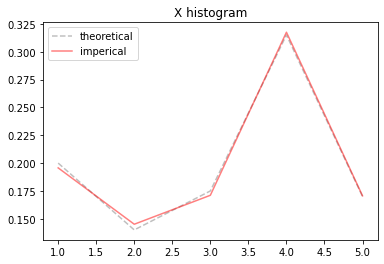

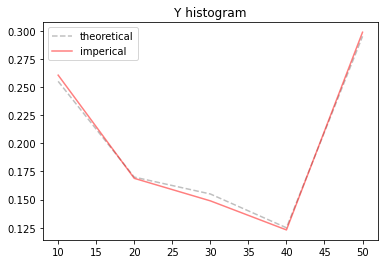

In [10]:
def draw_plot(v, p_v, p_v_imp, var_name):
    plt.plot(v, p_v, label='theoretical', color='gray', alpha=0.5, ls='--')
    plt.plot(v, p_v_imp, label=f'imperical', color='r', alpha=0.5)
    plt.title(f'{var_name} histogram')
    plt.legend()
    plt.show()

draw_plot(X, p_x, p_x_imp, 'X')
draw_plot(Y, p_y, p_y_imp, 'Y')